In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib import font_manager

from timple.timedelta import strftimedelta


import fastf1 as f1
import fastf1.plotting
from fastf1.core import Laps

teams = ["Ferrari", "Red Bull Racing", "Mercedes", "McLaren", "RB", "Aston Martin", "Kick Sauber", "Haas F1 Team", "Williams", "Alpine"]

team_colours = {
    "Ferrari": "#DC0000", 
    "Red Bull Racing": "#3671C6",
    "Mercedes": "#27F4D2",
    "McLaren": "#FF8000",
    "RB": "#3671C6",
    "Aston Martin": "#229971", 
    "Kick Sauber": "#52D252",
    "Haas F1 Team": "#B6BABD",
    "Williams": "#64C4FF",
    "Alpine": "#FF87BC"
}

tyre_colours = {
    "soft": "#E30E23",
    "medium": "#F2CA1F",
    "hard": "#E7E5E3",
    "inters": "#07A53C",
    "wets": "#3C65AB"
}

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1', misc_mpl_mods=True)

font_files = font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [4]:
data = f1.get_session(year=2024, gp="Bahrain", identifier="FP3")

req         WARNING 	DEFAULT CACHE ENABLED! (1.04 GB) C:\Users\maxvo\AppData\Local\Temp\fastf1


In [5]:
data.load()

core           INFO 	Loading data for Bahrain Grand Prix - Practice 3 [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data

In [17]:
sai_lap = data.laps.pick_driver("SAI").pick_fastest()
alo_lap = data.laps.pick_driver("ALO").pick_fastest()
ver_lap = data.laps.pick_driver("VER").pick_fastest()

sai_tel = sai_lap.get_car_data().add_distance()
alo_tel = alo_lap.get_car_data().add_distance()
ver_tel = ver_lap.get_car_data().add_distance()

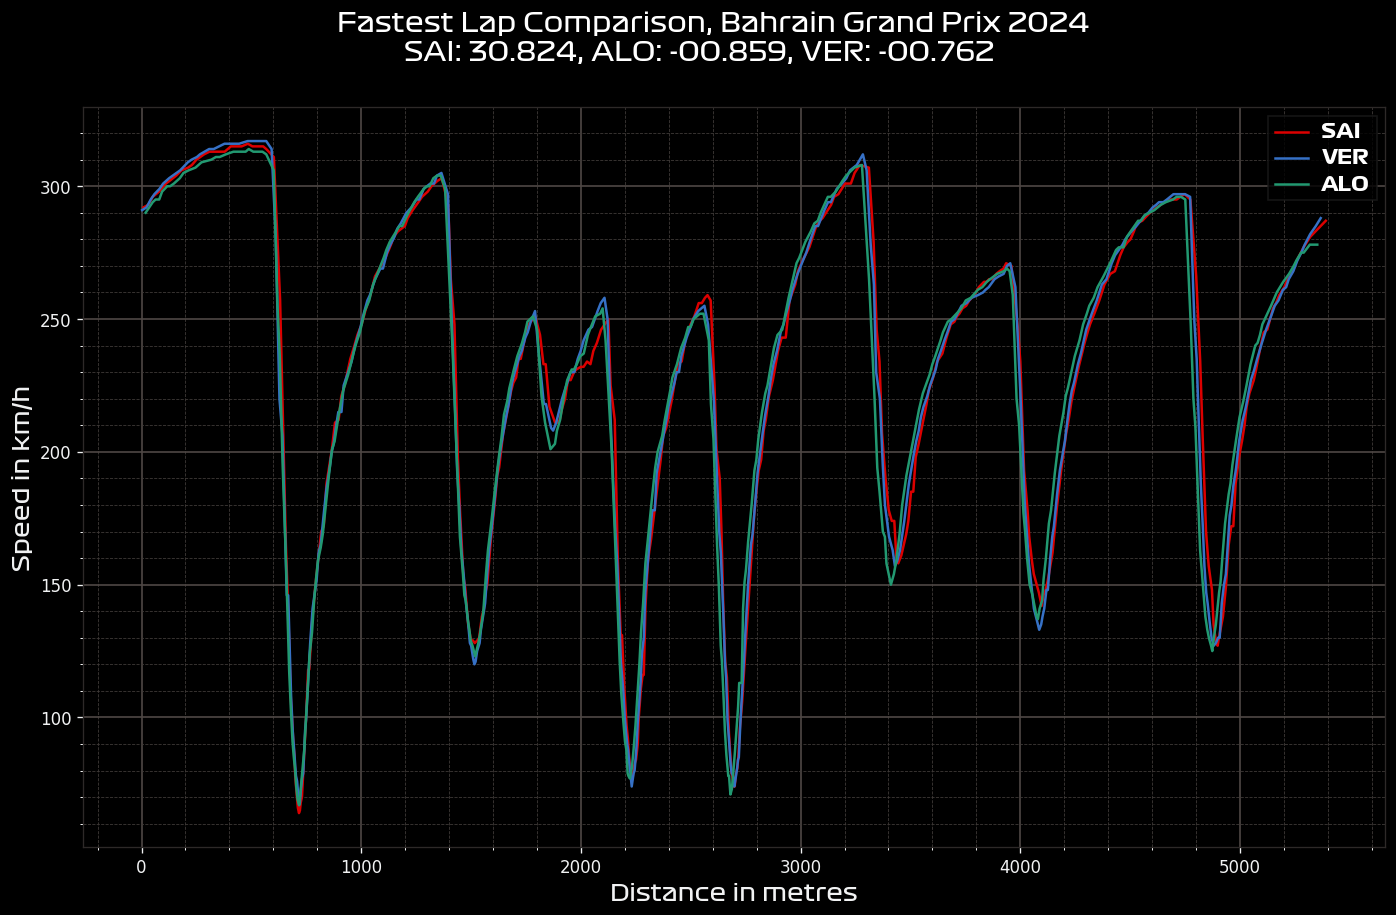

In [19]:
fer_colour = team_colours["Ferrari"]
amr_colour = team_colours["Aston Martin"]
rbr_colour = team_colours["Red Bull Racing"]

fig, ax = plt.subplots(figsize=(14,8), dpi=120)

ax.plot(sai_tel["Distance"], sai_tel["Speed"], color=fer_colour, label="SAI")
ax.plot(ver_tel["Distance"], ver_tel["Speed"], color=rbr_colour, label="VER")
ax.plot(alo_tel["Distance"], alo_tel["Speed"], color=amr_colour, label="ALO")


ax.set_xlabel("Distance in metres", fontname="Formula1", fontsize=14)
ax.set_ylabel("Speed in km/h", fontname="Formula1", fontsize=14)

ax.patch.set_facecolor("black")
l = ax.legend(facecolor="black", labelcolor="white")
plt.setp(l.texts, family="Formula1", size=12)


fig.patch.set_facecolor("black")

sai_lap_time = strftimedelta(sai_lap["LapTime"], "%s.%ms")
alo_diff = strftimedelta(sai_lap["LapTime"] - alo_lap["LapTime"], "%s.%ms")
ver_diff = strftimedelta(sai_lap["LapTime"] - ver_lap["LapTime"], "%s.%ms")


plt.suptitle(f"Fastest Lap Comparison, {data.event["EventName"]} {data.event.year}\nSAI: {sai_lap_time}, ALO: {alo_diff}, VER: {ver_diff}    ",
             fontsize=16, fontname="Formula1", color="white")

plt.show()
